# Análisis Exploratorio de Datos (EDA) para Predecir si un Producto es Nuevo o Usado


In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura del dataset original


In [33]:
df = pd.read_json("./dataset/MLA_100k.jsonlines", lines=True)
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

## Columnas con valores NaN o nulos


In [35]:
print("Rows lenhgt: ", len(df))
df.isnull().sum().loc[lambda x: x > 0]

Rows lenhgt:  100000


warranty                 60896
seller_contact           97781
parent_item_id           23011
official_store_id        99182
differential_pricing    100000
original_price           99857
video_id                 97015
catalog_product_id       99989
subtitle                100000
dtype: int64

## Analisis grafico

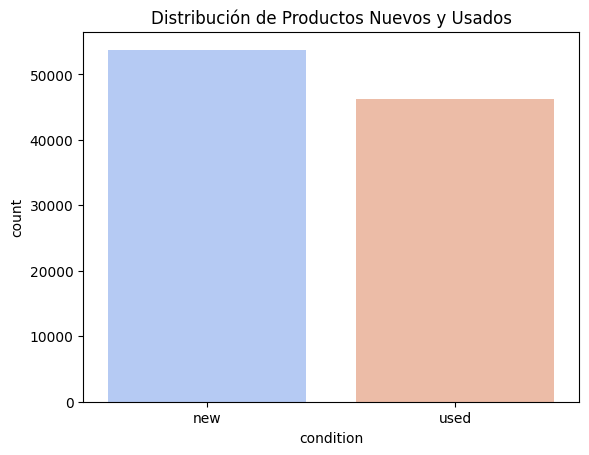

In [59]:
sns.countplot(x=df["condition"], hue=df["condition"], palette="coolwarm")
plt.title("Distribución de Productos Nuevos y Usados")
plt.show()

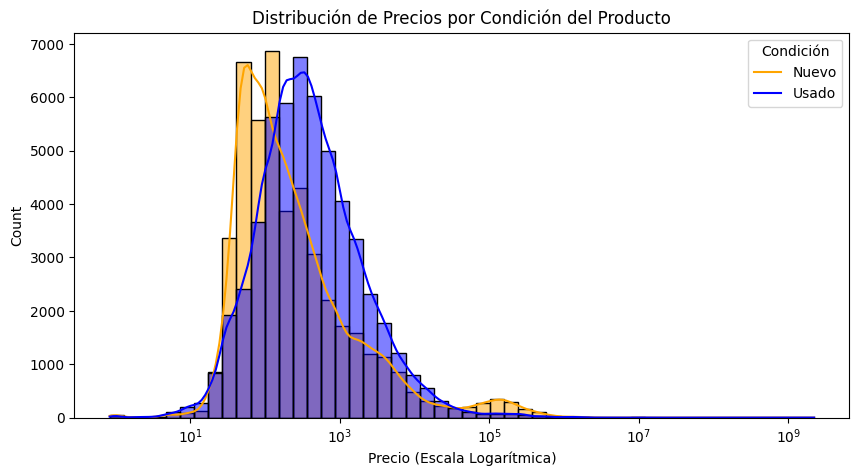

In [37]:
plt.figure(figsize=(10, 5))

precio_max = df["price"].max()
max_price_row = df[df["price"] == precio_max].iloc[0]

sns.histplot(
    data=df,
    x="price",
    hue="condition",
    bins=50,
    kde=True,
    log_scale=(True, False),
    palette={"new": "blue", "used": "orange"},
)

plt.xlabel("Precio (Escala Logarítmica)")
plt.title("Distribución de Precios por Condición del Producto")
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.show()

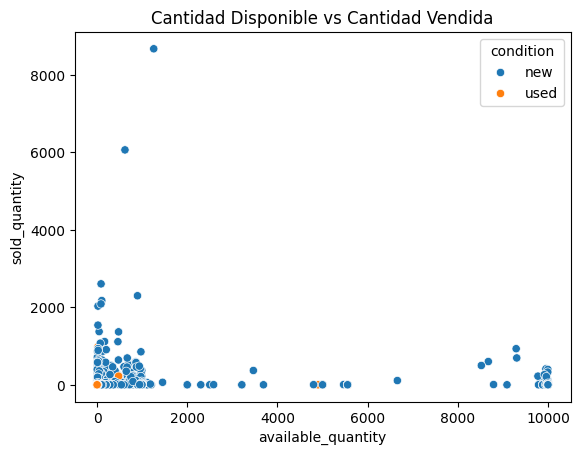

In [38]:
sns.scatterplot(
    x=df["available_quantity"],
    y=df["sold_quantity"],
    hue=df["condition"],
)
plt.title("Cantidad Disponible vs Cantidad Vendida")
plt.show()

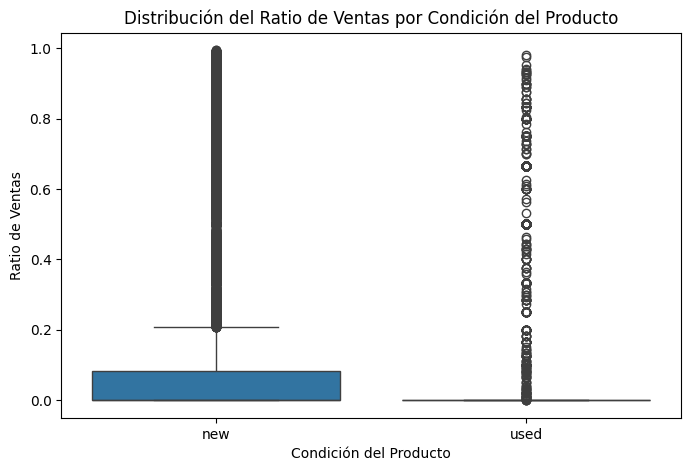

In [39]:
plt.figure(figsize=(8, 5))
sales_ratio = df["sold_quantity"] / (
    df["sold_quantity"] + df["available_quantity"]
)
sns.boxplot(data=df, x="condition", y=sales_ratio)
plt.title("Distribución del Ratio de Ventas por Condición del Producto")
plt.xlabel("Condición del Producto")
plt.ylabel("Ratio de Ventas")
plt.show()

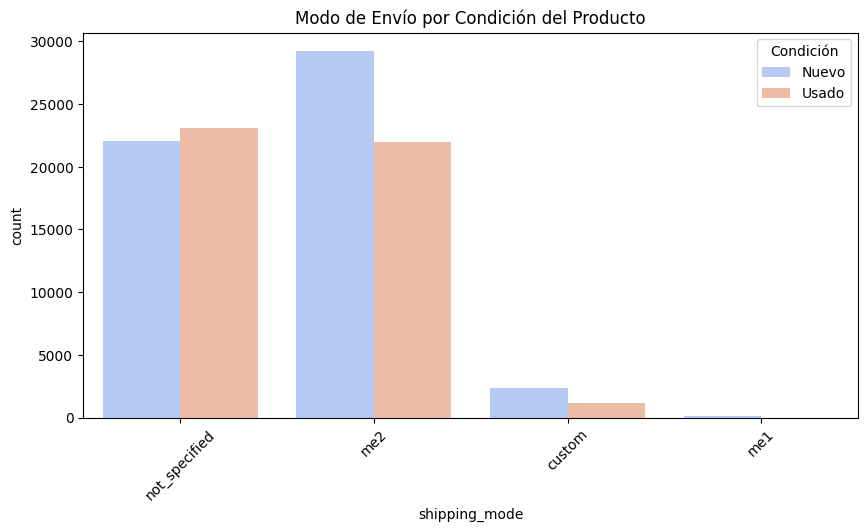

In [40]:
plt.figure(figsize=(10, 5))

shipping_mode = df["shipping"].apply(lambda x: x.get("mode"))

sns.countplot(x=shipping_mode, hue="condition", data=df, palette="coolwarm")
plt.xlabel("shipping_mode")
plt.title("Modo de Envío por Condición del Producto")
plt.xticks(rotation=45)
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.show()

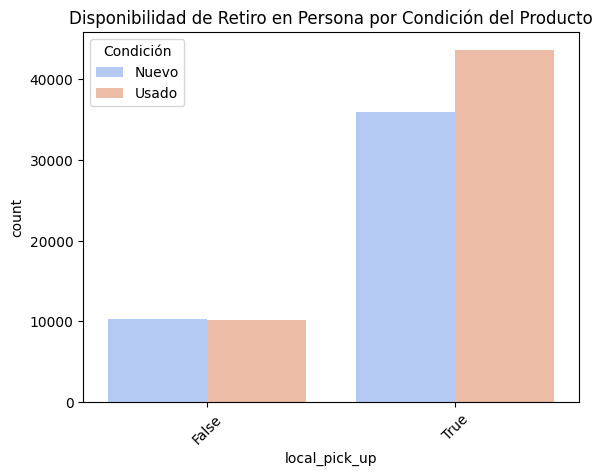

In [41]:
shipping_local_pick_up = df["shipping"].apply(
    lambda x: x.get("local_pick_up")
)

sns.countplot(x=shipping_local_pick_up, hue="condition", data=df, palette="coolwarm")
plt.title("Disponibilidad de Retiro en Persona por Condición del Producto")

plt.xlabel("local_pick_up")
plt.xticks(rotation=45)
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.show()


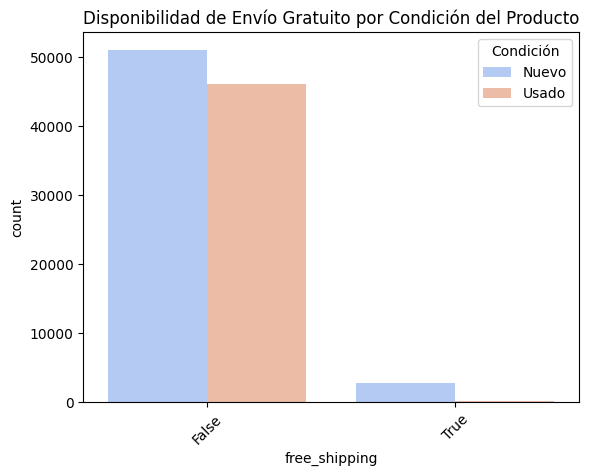

In [42]:
shipping_free_shipping = df["shipping"].apply(
    lambda x: x.get("free_shipping")
)

sns.countplot(x=shipping_free_shipping, hue="condition", data=df,  palette="coolwarm")
plt.title("Disponibilidad de Envío Gratuito por Condición del Producto")
plt.xticks(rotation=45)
plt.xlabel("free_shipping")
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.show()


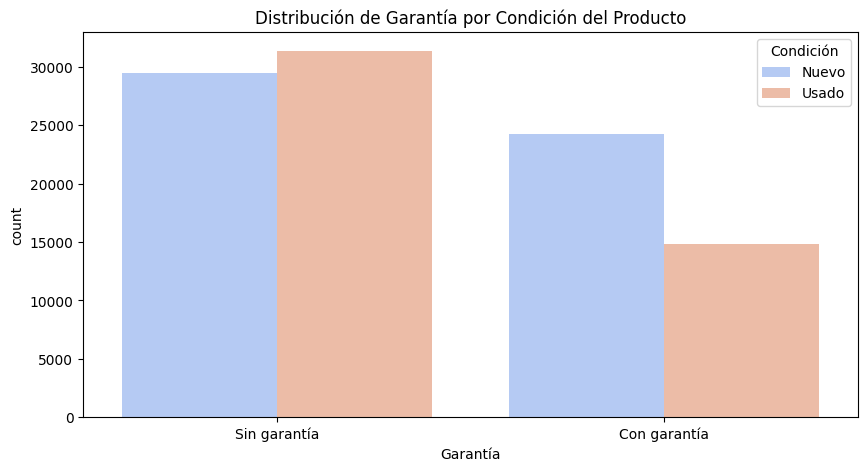

In [43]:
plt.figure(figsize=(10, 5))

has_warranty = df["warranty"].notna()

sns.countplot(data=df, x=has_warranty, hue="condition",  palette="coolwarm")

plt.xlabel("Garantía")
plt.xticks([0, 1], ["Sin garantía", "Con garantía"])
plt.title("Distribución de Garantía por Condición del Producto")
plt.legend(title="Condición", labels=["Nuevo", "Usado"])
plt.show()

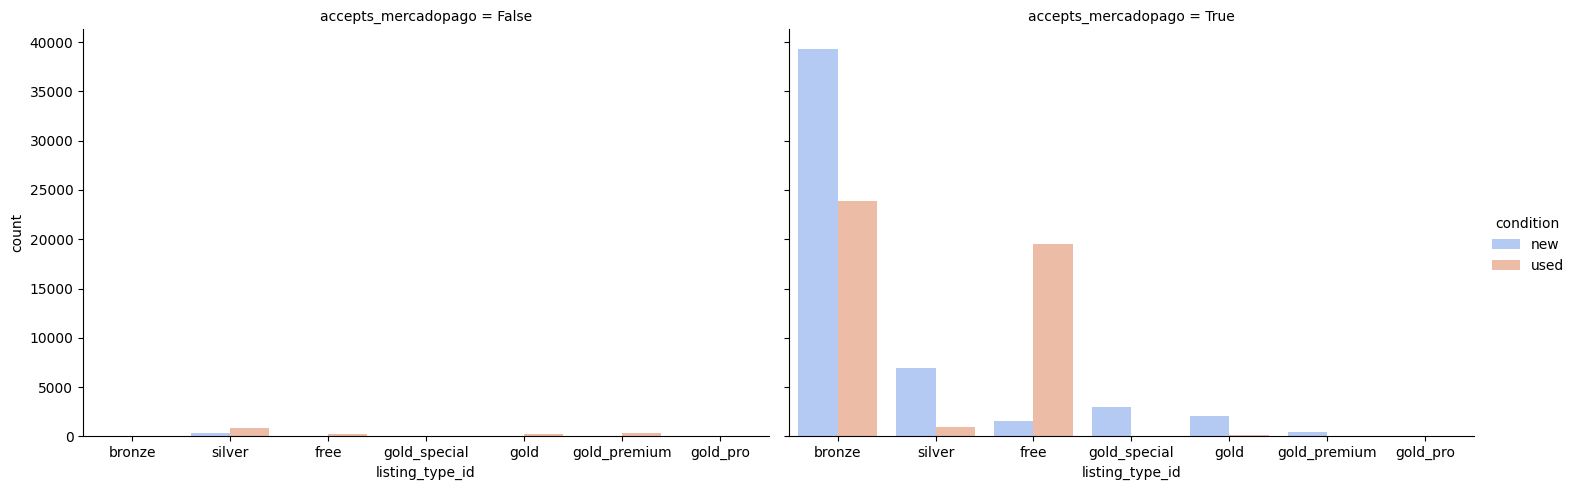

In [44]:
sns.catplot(
    data=df,  
    x="listing_type_id", 
    hue="condition", 
    col="accepts_mercadopago",
    kind="count",
    palette="coolwarm",
    height=5, aspect=1.5
)

plt.show()

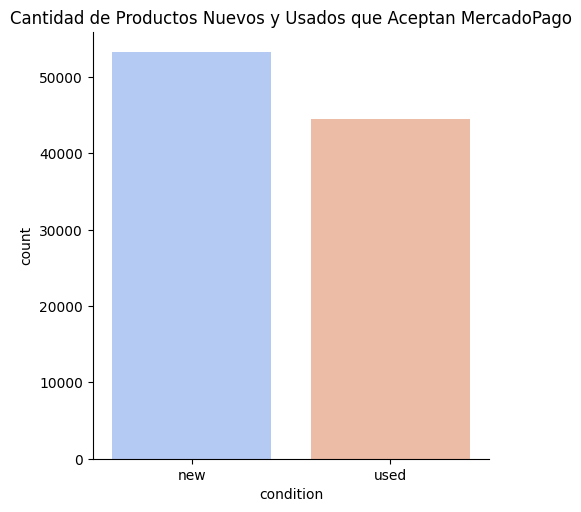

In [45]:
sns.catplot(
    data=df[df["accepts_mercadopago"] == True],  
    x="condition",
    hue="condition",  
    kind="count",
    palette="coolwarm",
    height=5, aspect=1,
    legend=False,
)

plt.title("Cantidad de Productos Nuevos y Usados que Aceptan MercadoPago")
plt.show()


## Filtrado de columnas

Se eliminan la columnas irrelevantes y las que contienen mayormente valores nulos

```
relevant_columns = ["condition", "title", "price", "listing_type_id", "sold_quantity",
                    "available_quantity", "accepts_mercadopago", "shipping", "warranty",
                    "buying_mode", "date_created", "last_updated"]
```

## Realizar transformaciones y limpieza según las columnas seleccionadas

1. **condition**: Menciona si el producto es nuevo o usado.
2. **title**: Título del producto puede contener palabras clave como "nuevo" o "usado".
3. **price**: Precio del producto. Generalmente, los productos usados son más baratos que los nuevos.
4. **listing_type_id**: Información del vendedor (ej. gold_pro, gold_premium, etc.), que puede indicar si es un vendedor profesional.
5. **sold_quantity**: Cantidad de productos vendidos, útil para calcular el ratio de ventas.
6. **available_quantity**: Cantidad disponible de productos, también útil para calcular el ratio de ventas.
7. **accepts_mercadopago**: Indica si el vendedor acepta MercadoPago. Los productos nuevos tienden a aceptar en mayo medida mercado pago.
8. **shipping**: Contiene información relevante sobre el envío (ej. local_pick_up, free_shipping, mode).
9. **warranty**: Información sobre la garantía. Los productos nuevos suelen incluir garantía, mientras que los usados no.
10. **buying_mode**: Modo de compra. Una compra inmediata suele ser más probable para productos nuevos.
11. **date_created**: Fecha de creación de la publicación. Los productos con publicaciones más antiguas podrían ser usados o de baja demanda.
12. **last_updated**: Fecha de última actualización de la publicación. Si no se actualiza por mucho tiempo, es probable que el producto sea usado.


In [46]:
relevant_columns = [
    "condition",
    "title",
    "price",
    "listing_type_id",
    "sold_quantity",
    "available_quantity",
    "accepts_mercadopago",
    "shipping",
    "warranty",
    "buying_mode",
    "date_created",
    "last_updated",
]
df_copy = df.copy()
df_copy = df_copy[relevant_columns]
df_copy.head()

,condition,title,price,listing_type_id,sold_quantity,available_quantity,accepts_mercadopago,shipping,warranty,buying_mode,date_created,last_updated
0,new,Auriculares Samsung Originales Manos Libres Ca...,80.0,bronze,0,1,True,"{'local_pick_up': True, 'methods': [], 'tags':...",None,buy_it_now,2015-09-05T20:42:53.000Z,2015-09-05T20:42:58.000Z
1,used,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,2650.0,silver,0,1,True,"{'local_pick_up': True, 'methods': [], 'tags':...",NUESTRA REPUTACION,buy_it_now,2015-09-26T18:08:30.000Z,2015-09-26T18:08:34.000Z
2,used,"Antigua Revista Billiken, N° 1826, Año 1954",60.0,bronze,0,1,True,"{'local_pick_up': True, 'methods': [], 'tags':...",None,buy_it_now,2015-09-09T23:57:07.000Z,2015-09-09T23:57:10.000Z
3,new,Alarma Guardtex Gx412 Seguridad Para El Automo...,580.0,silver,0,1,True,"{'local_pick_up': True, 'methods': [], 'tags':...",None,buy_it_now,2015-09-28T18:47:56.000Z,2015-10-05T16:03:50.306Z
4,used,Serenata - Jennifer Blake,30.0,bronze,0,1,True,"{'local_pick_up': True, 'methods': [], 'tags':...",MI REPUTACION.,buy_it_now,2015-08-24T22:07:20.000Z,2015-08-28T13:37:41.000Z


## Nuevas columnas


- **sales_ratio**: sold_quantity / (sold_quantity + available_quantity).
  Si el ratio es alto, el producto es más demandado (posible indicador de producto nuevo). Si el ratio es bajo, puede ser un producto usado con menor rotación.


In [47]:
df_copy["sales_ratio"] = sales_ratio

- **has_warranty**: Se asigna un booleano dependiendo de si tiene o no garantia


In [48]:
df_copy["has_warranty"] = has_warranty

- **shipping_local_pick**:Los productos usados suelen venderse con retiro en persona.
- **free_shipping** Los productos nuevos suelen ofrecer envío gratuito para atraer compradores, los usados no suelen incluir este servicio.
- **shipping_mode**: Si el envio es gestionado por mercado libre es más probable que sea nuevo.


In [49]:
df_copy["shipping_local_pick_up"] = shipping_local_pick_up
df_copy["shipping_free_shipping"] = shipping_free_shipping
df_copy["shipping_mode"] = shipping_mode

Se extrae informacion de las fechas de creación y de actualización de las publicaciones de los productos.


In [50]:
df_copy["year_created"] = pd.to_datetime(df_copy["date_created"]).dt.year
df_copy["month_created"] = pd.to_datetime(df_copy["date_created"]).dt.strftime("%B")
df_copy["day_created"] = pd.to_datetime(df_copy["date_created"]).dt.strftime("%A")

df_copy["year_updated"] = pd.to_datetime(df_copy["last_updated"]).dt.year
df_copy["month_created"] = pd.to_datetime(df_copy["last_updated"]).dt.strftime("%B")
df_copy["day_created"] = pd.to_datetime(df_copy["last_updated"]).dt.strftime("%A")

## Eliminación las columnas innecesarias

Una vez extraida la informacion, se eliminan las columnas que ya no son necesarias.

In [51]:
df_copy.drop(
    columns=["shipping", "warranty", "date_created", "last_updated"],
    inplace=True,
)

## Dataframe limpio


In [52]:
df_copy.head(5)

,condition,title,price,listing_type_id,sold_quantity,available_quantity,accepts_mercadopago,buying_mode,sales_ratio,has_warranty,shipping_local_pick_up,shipping_free_shipping,shipping_mode,year_created,month_created,day_created,year_updated
0,new,Auriculares Samsung Originales Manos Libres Ca...,80.0,bronze,0,1,True,buy_it_now,0.0,False,True,False,not_specified,2015,September,Saturday,2015
1,used,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,2650.0,silver,0,1,True,buy_it_now,0.0,True,True,False,me2,2015,September,Saturday,2015
2,used,"Antigua Revista Billiken, N° 1826, Año 1954",60.0,bronze,0,1,True,buy_it_now,0.0,False,True,False,me2,2015,September,Wednesday,2015
3,new,Alarma Guardtex Gx412 Seguridad Para El Automo...,580.0,silver,0,1,True,buy_it_now,0.0,False,True,False,me2,2015,October,Monday,2015
4,used,Serenata - Jennifer Blake,30.0,bronze,0,1,True,buy_it_now,0.0,True,True,False,not_specified,2015,August,Friday,2015


In [53]:
df_copy.info()
df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   condition               100000 non-null  object 
 1   title                   100000 non-null  object 
 2   price                   100000 non-null  float64
 3   listing_type_id         100000 non-null  object 
 4   sold_quantity           100000 non-null  int64  
 5   available_quantity      100000 non-null  int64  
 6   accepts_mercadopago     100000 non-null  bool   
 7   buying_mode             100000 non-null  object 
 8   sales_ratio             100000 non-null  float64
 9   has_warranty            100000 non-null  bool   
 10  shipping_local_pick_up  100000 non-null  bool   
 11  shipping_free_shipping  100000 non-null  bool   
 12  shipping_mode           100000 non-null  object 
 13  year_created            100000 non-null  int32  
 14  month_created        

,price,sold_quantity,available_quantity,sales_ratio,year_created,year_updated
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.252433e+04,2.396990,34.842380,0.082431,2014.998610,2014.999950
std,8.623127e+06,42.685077,420.808403,0.214277,0.039599,0.007071
min,8.400000e-01,0.000000,1.000000,0.000000,2013.000000,2014.000000
25%,9.000000e+01,0.000000,1.000000,0.000000,2015.000000,2015.000000
50%,2.500000e+02,0.000000,1.000000,0.000000,2015.000000,2015.000000
75%,8.000000e+02,0.000000,2.000000,0.000000,2015.000000,2015.000000
max,2.222222e+09,8676.000000,9999.000000,0.994751,2015.000000,2015.000000


## Guarda el dataset resultante

In [54]:
df_sample = df.sample(frac=0.1, random_state=42)
df_sample.to_csv("transformed_dataset.csv", index=False)

In [ ]:
os.system("jupyter nbconvert --to html --log-level=ERROR transformations.ipynb")